# KNN used for:
    Predict cancer is malignant or benign
    Pattern recognition
    Recommender Systems
    Computer Vision
    Gene Expression
    Protein-Protein Interaction and 3D Structure Prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [6]:
df=pd.read_csv('data.csv')
df.columns=df.columns.str.lower()
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
private        777 non-null object
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f_undergrad    777 non-null int64
p_undergrad    777 non-null int64
outstate       777 non-null int64
room_board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s_f_ratio      777 non-null float64
perc_alumni    777 non-null int64
expend         777 non-null int64
grad_rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [7]:
pd.set_option('display.float_format','{:.4}'.format)
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0,777.0
mean,3.002e+03,2.019e+03,780.0,27.56,55.8,3.7e+03,855.3,1.044e+04,4.358e+03,549.4,1.341e+03,72.66,79.7,14.09,22.74,9.66e+03,65.46
std,3.87e+03,2.451e+03,929.2,17.64,19.8,4.85e+03,1.522e+03,4.023e+03,1.097e+03,165.1,677.1,16.33,14.72,3.958,12.39,5.222e+03,17.18
min,81.0,72.0,35.0,1.0,9.0,139.0,1.0,2.34e+03,1.78e+03,96.0,250.0,8.0,24.0,2.5,0.0,3.186e+03,10.0
25%,776.0,604.0,242.0,15.0,41.0,992.0,95.0,7.32e+03,3.597e+03,470.0,850.0,62.0,71.0,11.5,13.0,6.751e+03,53.0
50%,1.558e+03,1.11e+03,434.0,23.0,54.0,1.707e+03,353.0,9.99e+03,4.2e+03,500.0,1.2e+03,75.0,82.0,13.6,21.0,8.377e+03,65.0
75%,3.624e+03,2.424e+03,902.0,35.0,69.0,4.005e+03,967.0,1.292e+04,5.05e+03,600.0,1.7e+03,85.0,92.0,16.5,31.0,1.083e+04,78.0
max,4.809e+04,2.633e+04,6.392e+03,96.0,100.0,3.164e+04,2.184e+04,2.17e+04,8.124e+03,2.34e+03,6.8e+03,103.0,100.0,39.8,64.0,5.623e+04,118.0


Visual analysis

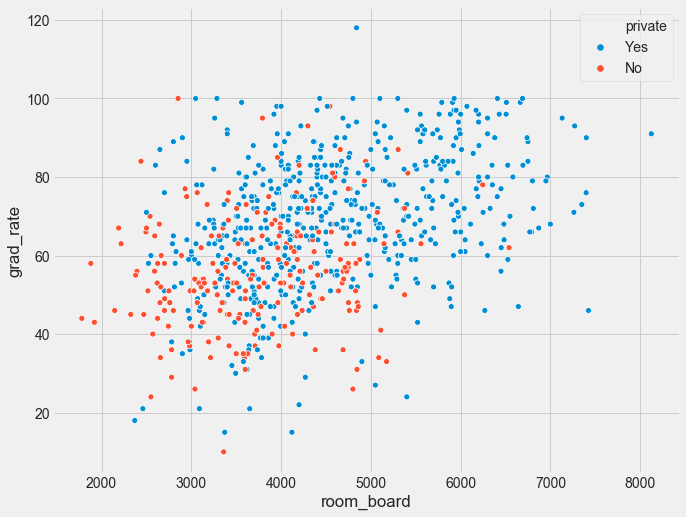

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot('room_board','grad_rate',data=df,hue='private')

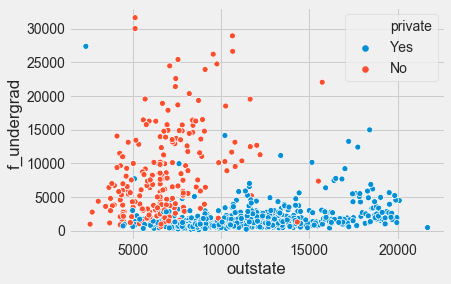

In [11]:
sns.scatterplot('outstate', 'f_undergrad', data=df, hue='private')

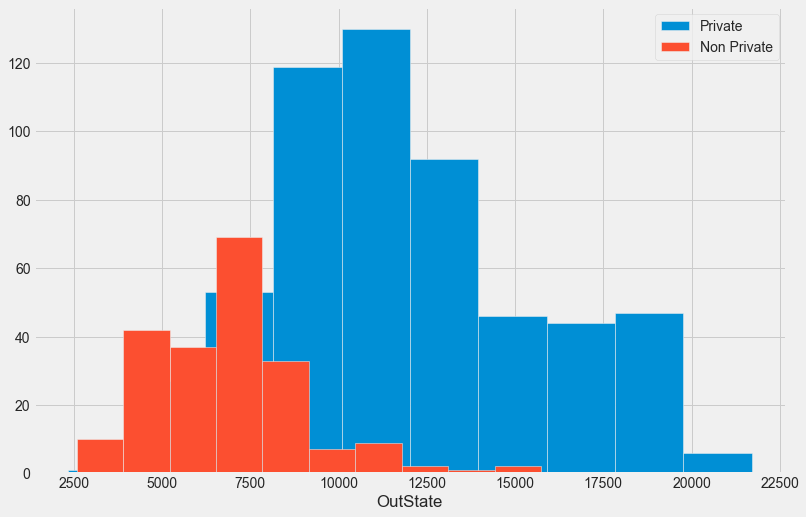

In [15]:
plt.figure(figsize=(12,8))

df.loc[df.private=='Yes','outstate'].hist(label='Private')
df.loc[df.private=='No','outstate'].hist(label='Non Private')
plt.xlabel('OutState')
plt.legend()


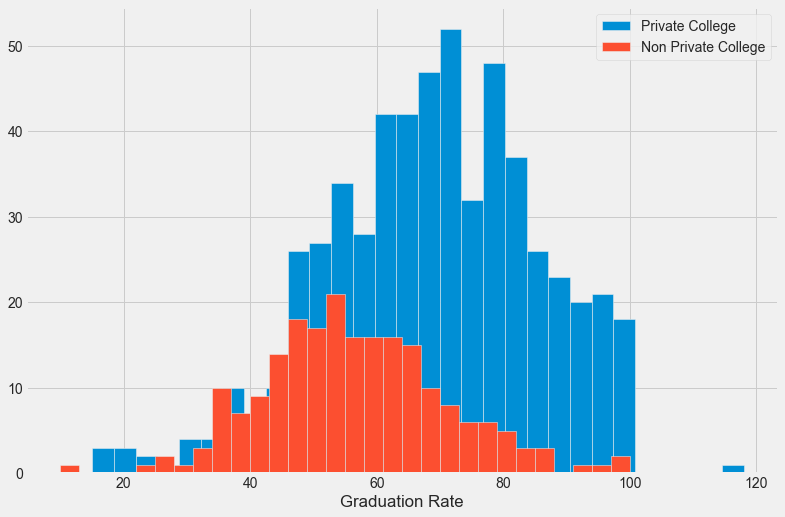

In [17]:
plt.figure(figsize=(12, 8))

df.loc[df.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
df.loc[df.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [20]:
df.loc[df.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [22]:
df.loc[df.grad_rate > 100, 'grad_rate'] = 100

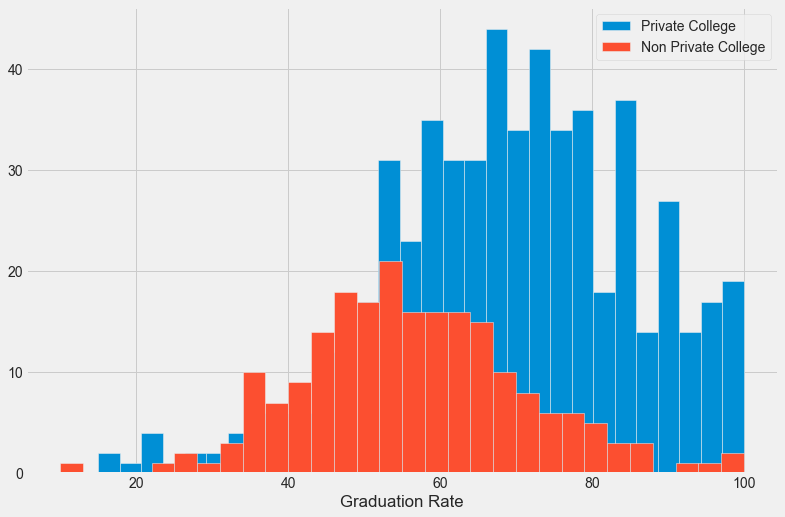

In [23]:
plt.figure(figsize=(12, 8))

df.loc[df.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
df.loc[df.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [25]:
df.private.value_counts()

Yes    565
No     212
Name: private, dtype: int64

# Standardize the Variables

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
x=df.drop(['private'],axis=1)
y=df.private
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

Classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [37]:
from sklearn.metrics import accuracy_score
scores = []

for n in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

Text(0.5, 0, 'K nearest neighbors')

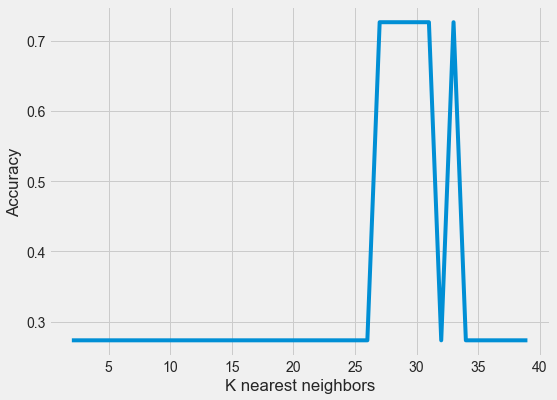

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 40), scores)
plt.ylabel("Accuracy")
plt.xlabel("K nearest neighbors")